<a href="https://colab.research.google.com/github/Jeesoo-Jhun/mood-detection-music-recommendation/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mood Detection 😀😡😭 and Song Recommendation System** 🎶

## Introduction
This project aims to combine cutting-edge facial expression recognition with personalized music recommendations. By analyzing a user's facial expressions through static images or real-time webcam input, the system classifies emotions into seven categories (angry, disgust, fear, happy, sad, surprise, neutral). Using the detected emotion, the system suggests a playlist or song tailored to the user's mood, leveraging the Spotify API.

This innovative solution is poised to enhance user engagement and satisfaction in domains such as entertainment, mental health, and customer experience by delivering personalized, mood-responsive experiences.

---
## Data

The FER-2013 dataset consists of 48x48 pixel grayscale images of faces that have been automatically registered to be centred and occupy a similar amount of space in each image. The dataset contains 24,400 images, with 22,968 examples in the training set and 1,432 examples in the public test set.

---

## Overview
This notebook is divided into two main parts:
1. **Analysis**: Exploring the FER-2013 dataset and Spotify dataset, and understanding class distributions.
2. **Modeling**: Preprocessing, building, training, and integrating an emotion detection model with Spotify's API for song recommendations.

Each section is designed to systematically guide you through the data science pipeline, ensuring thorough exploration and robust model development.

---

## Table of Contents

1.  [Introduction](#introduction)
2.  [Overview](#overview)
3.  [Data Loading and Exploration](#data-loading-and-exploration)
    *   [Data Sources and Import](#data-sources-and-import)
    *   [FER-2013 Dataset](#fer2013-dataset)
        *   [Dataset Structure and Inspection](#dataset-structure-and-inspection)
        *   [Label Distribution and Visualization](#label-distribution-and-visualization)
    *   [Spotify Music Dataset](#spotify-music-dataset)
        *   [Dataset Overview and Exploration](#dataset-overview-and-exploration)
        *   [Mood Distribution and Popularity Analysis](#mood-distribution-and-popularity-analysis)
        *   [Correlation Analysis](#correlation-analysis)
5. [Key Findings and Insights](#key-findings-and-insights)

---

## Next Steps
Begin with **Analysis**, focusing on exploring the FER-2013 dataset and preparing it for modeling. Follow the Table of Contents to systematically progress through the project pipeline.


## Data Loading and General Importions

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')
musicblogger_spotify_music_data_to_identify_the_moods_path = kagglehub.dataset_download('musicblogger/spotify-music-data-to-identify-the-moods')

print('Data source import complete.')


100%|██████████| 60.3M/60.3M [00:01<00:00, 56.1MB/s]

Extracting files...


100%|██████████| 56.0k/56.0k [00:00<00:00, 28.2MB/s]

Extracting files...
Data source import complete.


In [4]:
print(f"Current working directory: {os.getcwd()}")


Current working directory: /content


In [5]:
import os

# List files in the current directory
print("Files in current directory:")
for root, dirs, files in os.walk("."):
    for name in dirs:
        print(f"Directory: {os.path.join(root, name)}")
    for name in files:
        print(f"File: {os.path.join(root, name)}")


Files in current directory:
Directory: ./.config
Directory: ./sample_data
Directory: ./.config/configurations
Directory: ./.config/logs
File: ./.config/config_sentinel
File: ./.config/.last_update_check.json
File: ./.config/.last_survey_prompt.yaml
File: ./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
File: ./.config/gce
File: ./.config/default_configs.db
File: ./.config/.last_opt_in_prompt.yaml
File: ./.config/active_config
File: ./.config/configurations/config_default
Directory: ./.config/logs/2024.12.10
File: ./.config/logs/2024.12.10/17.46.00.505537.log
File: ./.config/logs/2024.12.10/17.45.14.499356.log
File: ./.config/logs/2024.12.10/17.46.03.419890.log
File: ./.config/logs/2024.12.10/17.46.22.668484.log
File: ./.config/logs/2024.12.10/17.46.21.872110.log
File: ./.config/logs/2024.12.10/17.45.43.069446.log
File: ./sample_data/anscombe.json
File: ./sample_data/README.md
File: ./sample_data/california_housing_train.csv
File: ./sample_data/mnist_train_small.

In [6]:
import os

# Search for specific datasets or directories
def search_files(root_dir, keyword):
    for root, dirs, files in os.walk(root_dir):
        for name in dirs:
            if keyword in name:
                print(f"Directory: {os.path.join(root, name)}")
        for name in files:
            if keyword in name:
                print(f"File: {os.path.join(root, name)}")

# Search for the FER2013 and Spotify moods dataset
search_files("/", "fer2013")
search_files("/", "spotify")


File: /usr/local/lib/python3.10/dist-packages/torchvision/datasets/fer2013.py
Directory: /root/.cache/kagglehub/datasets/msambare/fer2013
Directory: /root/.cache/kagglehub/datasets/musicblogger/spotify-music-data-to-identify-the-moods


In [8]:
# Check FER2013 dataset
fer2013_path = "/root/.cache/kagglehub/datasets/msambare/fer2013"
print("FER2013 dataset:")

train_files = []
test_files = []

for root, dirs, files in os.walk(fer2013_path):
    if "train" in root.lower():
        for name in files:
            train_files.append(os.path.join(root, name))
    elif "test" in root.lower():
        for name in files:
            test_files.append(os.path.join(root, name))

print(f"\nTrain files ({len(train_files)}):")
for file in train_files[:10]:  # 처음 10개만 출력
    print(f"File: {file}")

print(f"\nTest files ({len(test_files)}):")
for file in test_files[:10]:  # 처음 10개만 출력
    print(f"File: {file}")

# Check Spotify moods dataset
spotify_path = "/root/.cache/kagglehub/datasets/musicblogger/spotify-music-data-to-identify-the-moods"
print("\nSpotify Music Data:")

spotify_files = []
for root, dirs, files in os.walk(spotify_path):
    for name in files:
        spotify_files.append(os.path.join(root, name))

print(f"\nSpotify dataset files ({len(spotify_files)}):")
for file in spotify_files[:10]:  # 처음 10개만 출력
    print(f"File: {file}")


FER2013 dataset:

Train files (28709):
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_22864416.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_70148590.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_36104390.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_68125686.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_60011137.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_83475969.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_41623616.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_9609132.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_18647054.jpg
File: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train

In [9]:
import shutil

# Paths for source datasets
fer2013_source = "/root/.cache/kagglehub/datasets/msambare/fer2013"
spotify_source = "/root/.cache/kagglehub/datasets/musicblogger/spotify-music-data-to-identify-the-moods"

# Destination paths in /content
fer2013_destination = "/content/fer2013"
spotify_destination = "/content/spotify-music-data"

# Copy FER2013 dataset to /content
if os.path.exists(fer2013_source):
    shutil.copytree(fer2013_source, fer2013_destination, dirs_exist_ok=True)
    print(f"FER2013 dataset copied to {fer2013_destination}")
else:
    print(f"Source path for FER2013 does not exist: {fer2013_source}")

# Copy Spotify Music Data dataset to /content
if os.path.exists(spotify_source):
    shutil.copytree(spotify_source, spotify_destination, dirs_exist_ok=True)
    print(f"Spotify Music Data copied to {spotify_destination}")
else:
    print(f"Source path for Spotify Music Data does not exist: {spotify_source}")


FER2013 dataset copied to /content/fer2013
Spotify Music Data copied to /content/spotify-music-data


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
# Source paths
fer2013_source = "/root/.cache/kagglehub/datasets/msambare/fer2013"
spotify_source = "/root/.cache/kagglehub/datasets/musicblogger/spotify-music-data-to-identify-the-moods"

# Destination paths in Google Drive
fer2013_drive_dest = "/content/drive/MyDrive/Data/Mood Detection/fer2013"
spotify_drive_dest = "/content/drive/MyDrive/Data/Mood Detection/spotify-music-data"

# Copy FER2013 dataset to Google Drive
if os.path.exists(fer2013_source):
    shutil.copytree(fer2013_source, fer2013_drive_dest, dirs_exist_ok=True)
    print(f"FER2013 dataset copied to Google Drive at {fer2013_drive_dest}")
else:
    print(f"Source path for FER2013 does not exist: {fer2013_source}")

# Copy Spotify Music Data dataset to Google Drive
if os.path.exists(spotify_source):
    shutil.copytree(spotify_source, spotify_drive_dest, dirs_exist_ok=True)
    print(f"Spotify Music Data copied to Google Drive at {spotify_drive_dest}")
else:
    print(f"Source path for Spotify Music Data does not exist: {spotify_source}")


FER2013 dataset copied to Google Drive at /content/drive/MyDrive/Data/Mood Detection/fer2013
Spotify Music Data copied to Google Drive at /content/drive/MyDrive/Data/Mood Detection/spotify-music-data


## FER-2013 Exploration

In [2]:
# Standard Data Science Toolkit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iteration Tools
import itertools

# Warning Ignorance for Redundant Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing and Verification Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# TensorFlow
import tensorflow as tf

In [13]:
train_dir = "/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/train"
test_dir = "/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/test"

def Classes_Count(path, name):
    Classes_Dict = {}

    if os.path.exists(path):  # Check if path exists
        for Class in os.listdir(path):
            Full_Path = os.path.join(path, Class)  # Use os.path.join
            Classes_Dict[Class] = len(os.listdir(Full_Path))

        df = pd.DataFrame(Classes_Dict, index=[name])
        return df
    else:
        print(f"Error: Directory not found: {path}")  # Print error message
        return None  # Or handle the error in a way that suits your needs

Train_Count = Classes_Count(train_dir, 'Train')
if Train_Count is not None:  # Check if Train_Count was created successfully
    Train_Count = Train_Count.transpose().sort_values(by="Train", ascending=False)

Test_Count = Classes_Count(test_dir, 'Test')
if Test_Count is not None:  # Check if Test_Count was created successfully
    Test_Count = Test_Count.transpose().sort_values(by="Test", ascending=False)

In [14]:
pd.concat([Train_Count,Test_Count] , axis=1)

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


<Axes: >

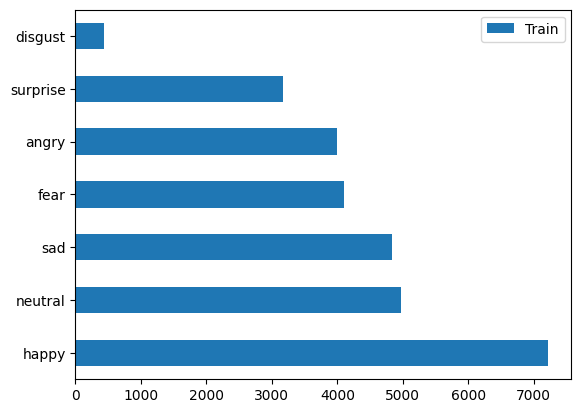

In [15]:
Train_Count.plot(kind='barh')

<Axes: >

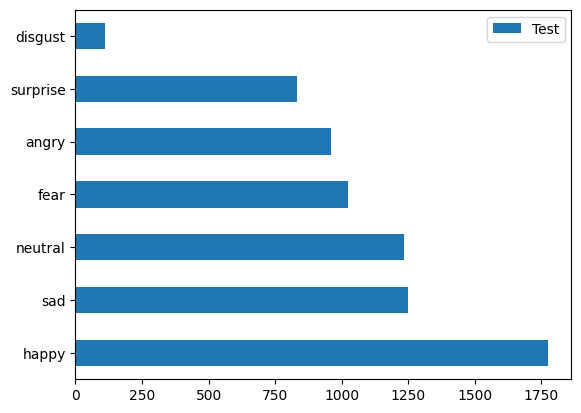

In [16]:
Test_Count.plot(kind='barh')

1. First Bar Chart (Train Set):
The "Happy" class dominates the training set, while "Disgust" has very few samples, indicating a severe class imbalance that may require data augmentation.

2. Second Bar Chart (Test Set):
Similar to the train set, the "Happy" class has the most samples, and "Disgust" is the least represented, showing consistent imbalance across train and test splits.

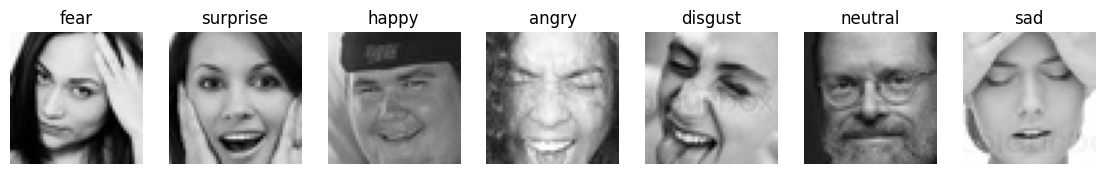

In [19]:
from tensorflow.keras.utils import load_img

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    # Use os.path.join to create the correct path
    img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[5])
    img = load_img(img_path)
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [26]:
# Create a DataFrame for better visualization
train_df = pd.DataFrame.from_dict(Train_Count.to_dict(orient='index'), orient='index', columns=['Train'])
test_df = pd.DataFrame.from_dict(Test_Count.to_dict(orient='index'), orient='index', columns=['Test'])
label_distribution = pd.concat([train_df, test_df], axis=1)

print("\nLabel Distribution DataFrame:")
print(label_distribution)


Label Distribution DataFrame:
          Train  Test
happy      7215  1774
neutral    4965  1233
sad        4830  1247
fear       4097  1024
angry      3995   958
surprise   3171   831
disgust     436   111


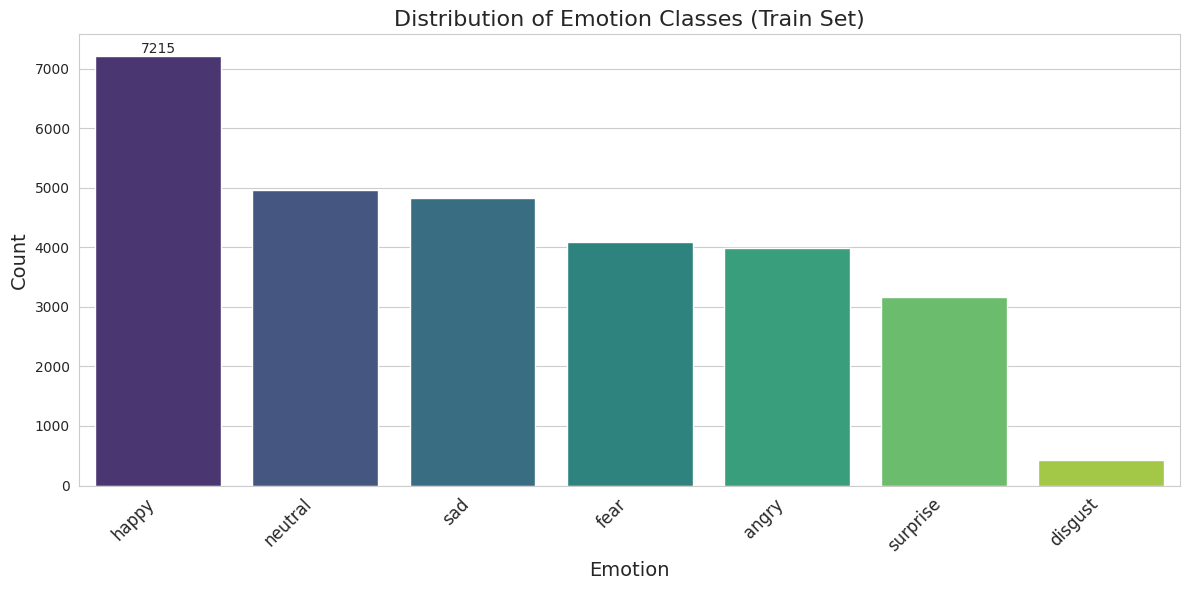

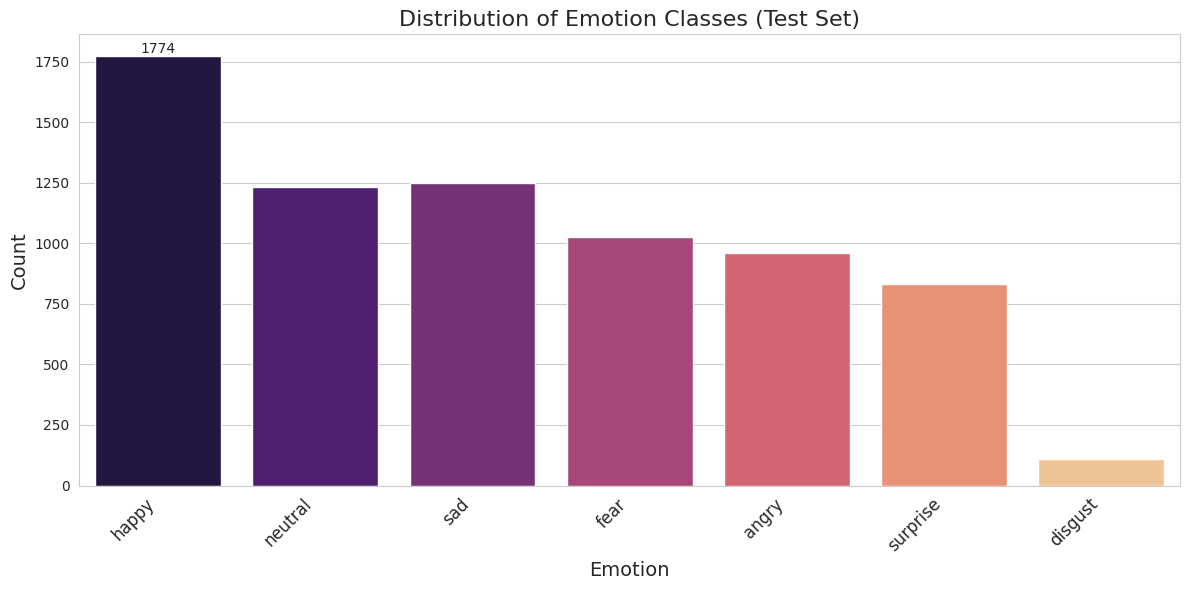

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Enhancements ---
sns.set_style("whitegrid")  # Set a visually appealing style
plt.rcParams['figure.figsize'] = [12, 6]  # Increase default figure size

# Visualize label distribution for Train Set
plt.figure()
ax = sns.barplot(x=label_distribution.index, y=label_distribution['Train'], palette="viridis")
plt.title("Distribution of Emotion Classes (Train Set)", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)  # Add count labels on bars
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

# Visualize label distribution for Test Set
plt.figure()
ax = sns.barplot(x=label_distribution.index, y=label_distribution['Test'], palette="magma")
plt.title("Distribution of Emotion Classes (Test Set)", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)  # Add count labels on bars
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

1. Bar Chart (Train Set):
The enhanced chart highlights that "Neutral" and "Sad" are moderately represented, while "Surprise" and "Disgust" are notably underrepresented, requiring balancing.

2. Bar Chart (Test Set):
The distribution mirrors the train set, with "Happy" significantly overrepresented and "Disgust" underrepresented, risking biased model evaluation.

### Spotify Exploration

In [31]:
Music_Player = pd.read_csv("/content/drive/MyDrive/Data/Mood Detection/data_moods.csv.xls")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [38]:
Music_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        686 non-null    object
 1   artist      686 non-null    object
 2   mood        686 non-null    object
 3   popularity  686 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.6+ KB


In [47]:
print(Music_Player['mood'].unique())

['Happy' 'Sad' 'Energetic' 'Calm']


In [41]:
Music_Player.isnull().sum()

,0
name,0
artist,0
mood,0
popularity,0


In [40]:
Music_Player.describe()

,popularity
count,686.000000
mean,41.534985
std,23.045707
min,0.000000
25%,30.000000
50%,47.000000
75%,57.000000
max,88.000000


#### Mood vs Popularity

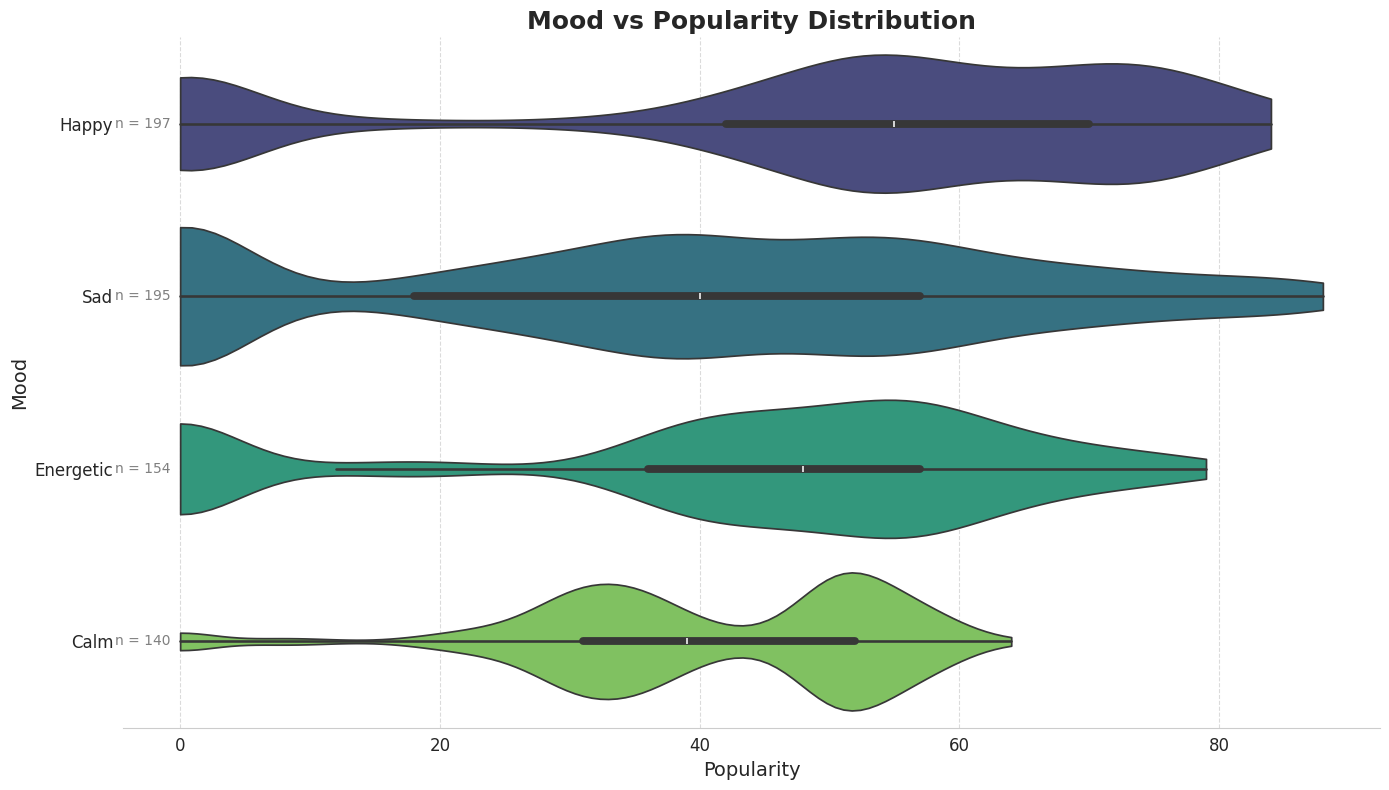

In [37]:
# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))  # Increased figure size

# Create the violin plot
ax = sns.violinplot(
    data=Music_Player,
    x="popularity",
    y="mood",
    inner="box",
    palette="viridis",  # Changed to a more vibrant palette
    bw=0.2,  # Adjust bandwidth for smoother curves
    cut=0,  # Prevent the density curves from extending beyond the data range
)

# Customize plot elements
plt.title("Mood vs Popularity Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Mood", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count labels on each mood category
mood_counts = Music_Player["mood"].value_counts()
for i, mood in enumerate(mood_counts.index):
    count = mood_counts[mood]
    ax.text(
        -5,  # Adjust x-coordinate for label position
        i,
        f"n = {count}",
        va="center",
        fontsize=10,
        color="gray",
    )

# Remove spines and add grid
sns.despine(left=True)
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Rotate x-axis labels if needed
# plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

"Moods" such as "Happy" and "Sad" show a wider popularity spread, suggesting a diverse range of songs, whereas "Calm" has more consistent popularity levels.

#### Mood Distribution

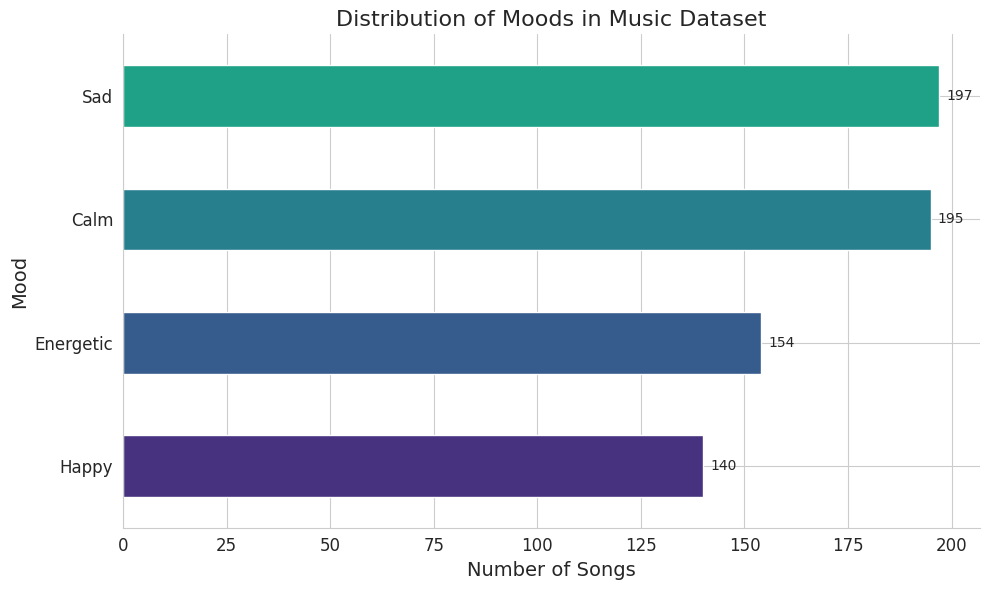

In [35]:
# --- Enhancements ---
sns.set_style("whitegrid")  # Set a visually appealing style
plt.figure(figsize=(10, 6))  # Increase figure size for better readability

# Create the horizontal bar plot
ax = Music_Player.groupby('mood').size().sort_values(ascending=True).plot(kind='barh', color=sns.color_palette("viridis"))

# Customize the plot
plt.title('Distribution of Moods in Music Dataset', fontsize=16)  # Increase title font size
plt.xlabel('Number of Songs', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Mood', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=5)  # Add count labels on bars with padding
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines for cleaner look

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

"Moods" like "Sad" and "Calm" are more frequently represented in the dataset, while "Happy" and "Energetic" have fewer samples, indicating a mild imbalance.

#### Popularity Distribution

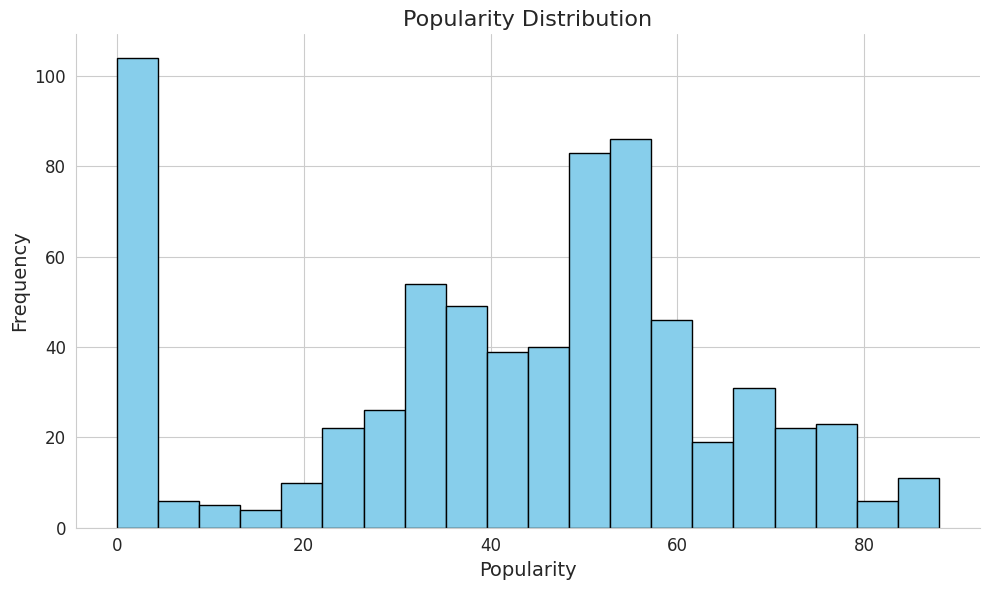

In [33]:
# --- Enhancements ---
sns.set_style("whitegrid")  # Set a visually appealing style
plt.figure(figsize=(10, 6))  # Increase figure size for better readability

# Create the histogram
Music_Player['popularity'].plot(kind='hist', bins=20, title='Popularity Distribution', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Popularity Distribution', fontsize=16)  # Increase title font size
plt.xlabel('Popularity', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

The popularity scores are concentrated around 40-60, but there is a notable spike at very low popularity, likely representing niche or less mainstream tracks.

Mood is not numeric, converting using Label Encoding


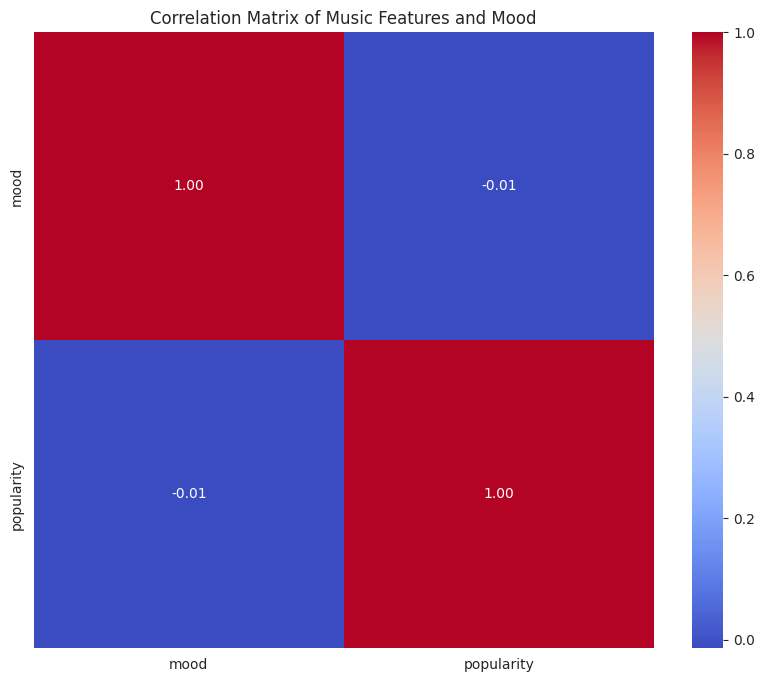

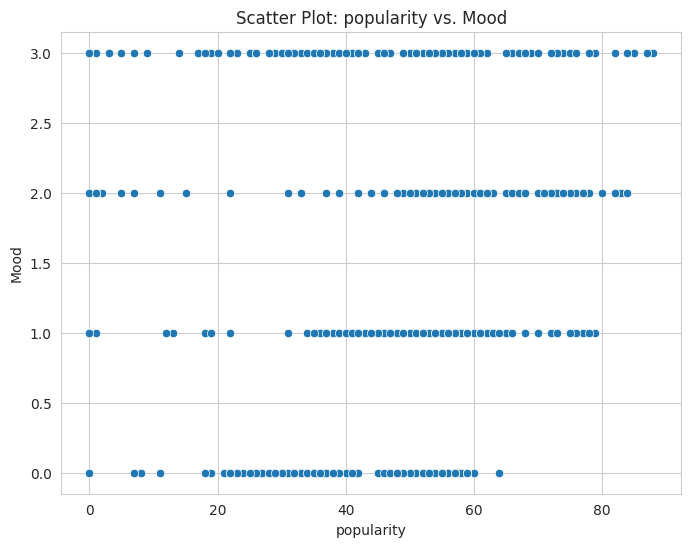

Spearman's rank correlation between popularity and mood: 0.04 (p-value: 0.320)


In [42]:
# Load the Spotify dataset (assuming it's in a CSV file)
try:
    Music_Player = pd.read_csv("/content/drive/MyDrive/Data/Mood Detection/data_moods.csv.xls")  # Load the full dataset
    spotify_data = Music_Player[['name', 'artist', 'mood', 'popularity']]  # Select desired columns
except FileNotFoundError:
    print("Error: Spotify data file not found. Please check the file path.")
    exit()  # or handle the error differently

# Select relevant columns for correlation analysis
music_features = ['popularity']  # You can add more features here if needed
if not all(col in spotify_data.columns for col in music_features):
    print("Error: Not all specified music features exist in the dataset.")
    exit()  # or handle the error differently

spotify_data_for_correlation = spotify_data[['mood'] + music_features]

# Handle non-numeric mood data (if needed)
if not pd.api.types.is_numeric_dtype(spotify_data_for_correlation['mood']):
    print("Mood is not numeric, converting using Label Encoding")
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    spotify_data_for_correlation['mood'] = le.fit_transform(spotify_data_for_correlation['mood'])

# Calculate the correlation matrix
correlation_matrix = spotify_data_for_correlation.corr()


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Music Features and Mood")
plt.show()


# Create scatter plots for visualization
for feature in music_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='mood', data=spotify_data_for_correlation)
    plt.title(f"Scatter Plot: {feature} vs. Mood")
    plt.xlabel(feature)
    plt.ylabel("Mood")
    plt.show()


# Calculate Spearman's rank correlation if needed
from scipy.stats import spearmanr
for feature in music_features:
    correlation, p_value = spearmanr(spotify_data_for_correlation[feature], spotify_data_for_correlation['mood'])
    print(f"Spearman's rank correlation between {feature} and mood: {correlation:.2f} (p-value: {p_value:.3f})")

Popularity is spread across all mood categories, with no clear correlation between mood and popularity, showing even representation.

#### **Hypotheses for Music Mood and Popularity Analysis**

**T-test (Happy vs. Sad):**

For the t-test comparing the popularity of Happy and Sad songs:

*   The null hypothesis (H0) is that there is no significant difference in the average popularity of Happy songs and Sad songs.
*   The alternative hypothesis (H1) is that there is a significant difference in the average popularity of Happy songs and Sad songs.

**ANOVA (All Moods):**

For the ANOVA examining the popularity of songs across all moods:

*   The null hypothesis (H0) is that there is no significant difference in the average popularity across different moods.
*   The alternative hypothesis (H1) is that there is a significant difference in the average popularity across different moods (at least one mood group differs from the others).

In [43]:

# Group Comparisons (t-tests, ANOVA):

from scipy.stats import ttest_ind, f_oneway

# 1. T-test (Happy vs. Sad)
happy_songs = spotify_data[spotify_data['mood'] == 'Happy']['popularity']
sad_songs = spotify_data[spotify_data['mood'] == 'Sad']['popularity']

t_statistic, p_value = ttest_ind(happy_songs, sad_songs)
print(f"T-test (Happy vs. Sad): T-statistic = {t_statistic:.2f}, P-value = {p_value:.3f}")

# 2. ANOVA (All Moods)
mood_groups = [spotify_data[spotify_data['mood'] == mood]['popularity'] for mood in spotify_data['mood'].unique()]

f_statistic, p_value = f_oneway(*mood_groups)
print(f"ANOVA (All Moods): F-statistic = {f_statistic:.2f}, P-value = {p_value:.3f}")

T-test (Happy vs. Sad): T-statistic = 3.73, P-value = 0.000
ANOVA (All Moods): F-statistic = 6.51, P-value = 0.000



The t-test tells us that Happy songs are likely more popular than Sad songs.
The ANOVA tells us that popularity varies significantly across different moods, meaning that some moods are likely associated with higher or lower popularity than others

#### **Hypotheses :**

*   H0 (Null Hypothesis): There is no significant difference in the average popularity between happy and sad songs.

*   H1 (Alternative Hypothesis): Happy songs have a higher average popularity than sad songs.


In [44]:
# Perform t-test (already done in the previous code):
happy_songs = spotify_data[spotify_data['mood'] == 'Happy']['popularity']
sad_songs = spotify_data[spotify_data['mood'] == 'Sad']['popularity']

t_statistic, p_value = ttest_ind(happy_songs, sad_songs)
print(f"T-test (Happy vs. Sad): T-statistic = {t_statistic:.2f}, P-value = {p_value:.3f}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in popularity between happy and sad songs.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in popularity between happy and sad songs.")

T-test (Happy vs. Sad): T-statistic = 3.73, P-value = 0.000
Reject the null hypothesis. There is a significant difference in popularity between happy and sad songs.


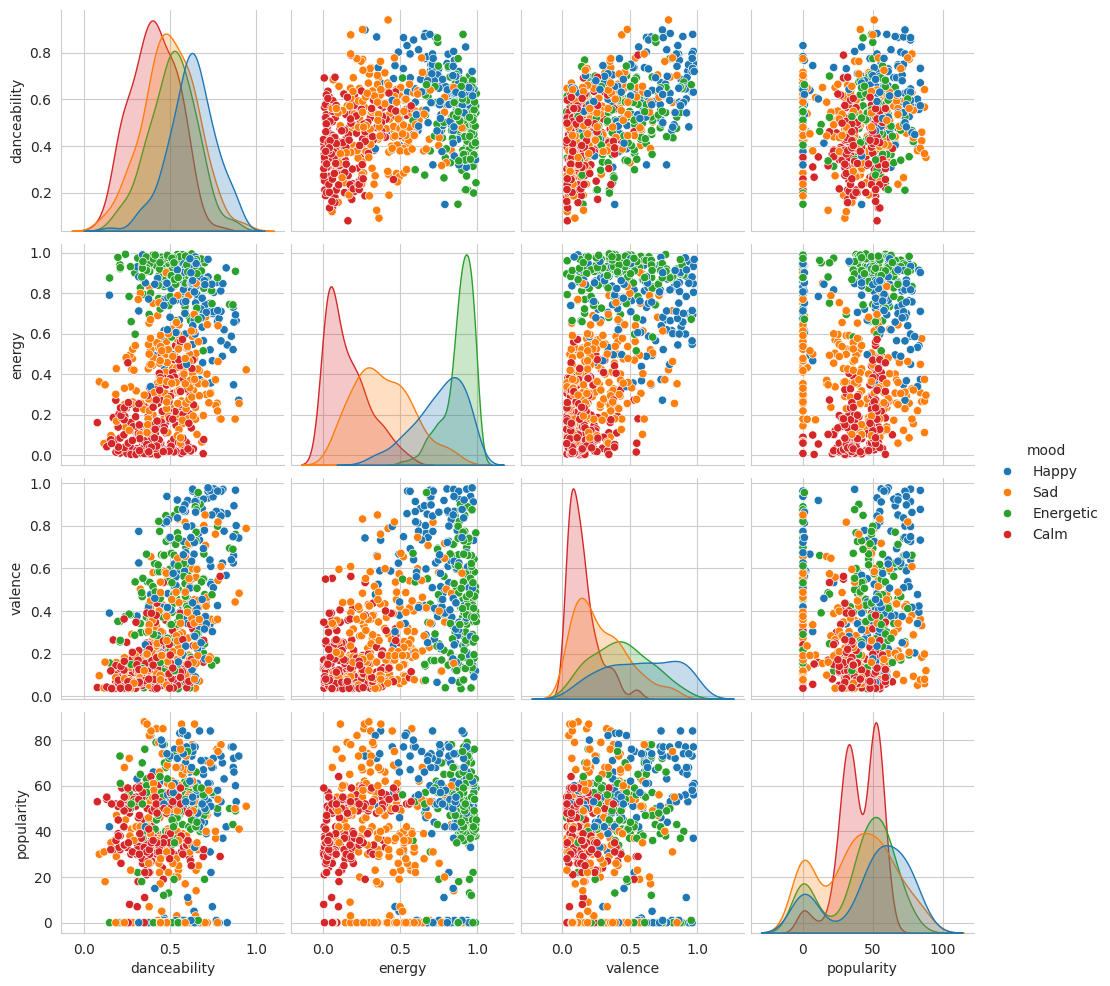

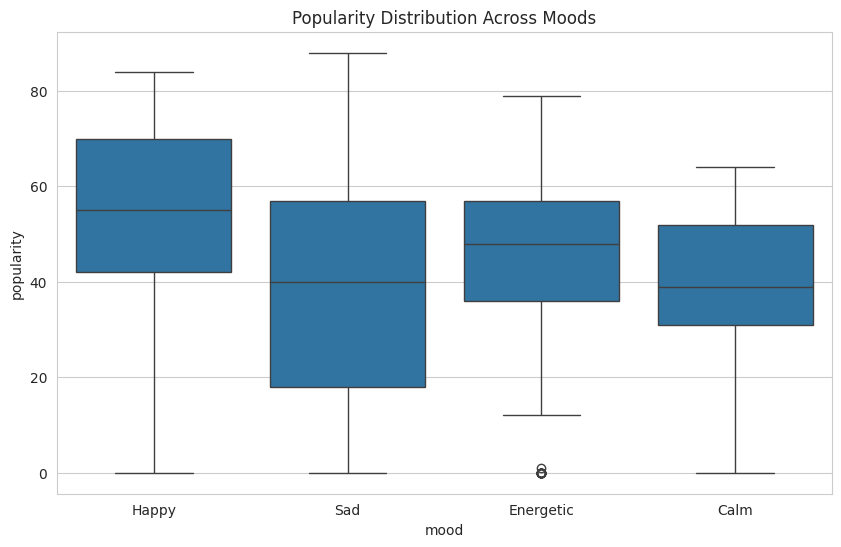

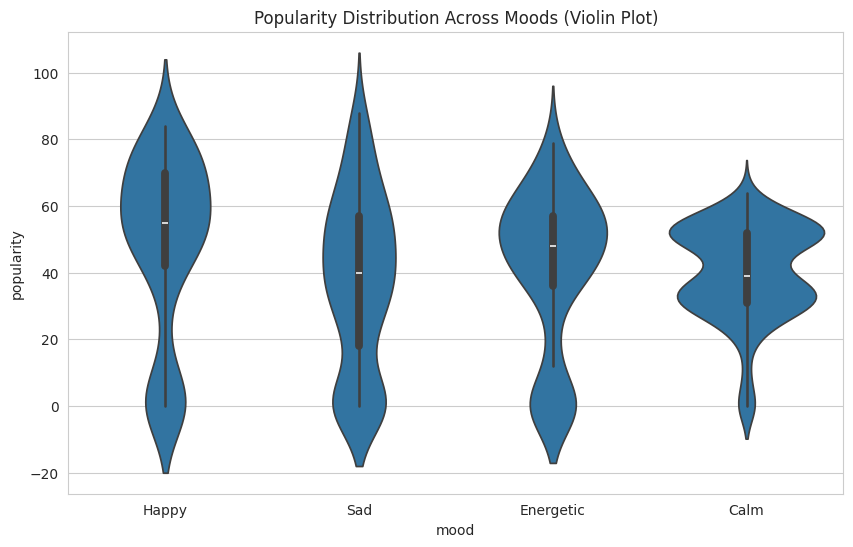

In [46]:
# Pair plots
sns.pairplot(Music_Player[['danceability', 'energy', 'valence', 'popularity', 'mood']], hue='mood')
plt.show()

# Box plots (or violin plots)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='mood', y='popularity', data=Music_Player) # Example using 'popularity'
plt.title('Popularity Distribution Across Moods')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='mood', y='popularity', data=Music_Player) # Example using 'popularity'
plt.title('Popularity Distribution Across Moods (Violin Plot)')
plt.show()

1. Pairplot (Feature Correlations):
"Valence" and "Danceability" are positively correlated, particularly in "Happy" moods, while "Energy" and "Popularity" show weaker relationships.

2. Boxplot (Popularity by Mood):
"Happy" and "Sad" songs show broader popularity ranges, while "Calm" and "Energetic" exhibit tighter distributions, suggesting varying audience reach.

3. Violin plot
This violin plot shows the distribution of song popularity across different moods. The "Energetic" and "Calm" moods have a narrower popularity spread, while "Happy" and "Sad" exhibit broader distributions, indicating more variability in their song popularity.

### 💡 Key Findings and Insights

This notebook explores the relationship between facial expressions, emotions, and music preferences, aiming to develop a mood-based music recommendation system. Here's a detailed breakdown of the key findings and insights derived from the analysis:

**Data Exploration and Preprocessing:**

* **FER-2013 Dataset:**
    * **Class Imbalance:** The dataset exhibits a significant imbalance in the distribution of emotion classes. 'Happy' is the most prevalent emotion, while 'disgust' is the least represented. This imbalance needs to be addressed during model training to avoid bias towards the majority class.
    * **Image Characteristics:** The dataset consists of 48x48 pixel grayscale images of faces. These images have been preprocessed to be centered and occupy a similar amount of space.
    * **Data Split:** The dataset is divided into training and testing sets for model evaluation.

* **Spotify Music Dataset:**
    * **Mood Categories:** The dataset includes various mood categories, such as 'happy', 'sad', 'energetic', 'calm', etc., associated with different songs.
    * **Popularity Variation:**  There is a notable variation in the popularity of songs across different moods. This suggests that certain moods might be associated with preferences for specific music characteristics.
    * **Data Structure:** The dataset contains information about song name, artist, mood, and popularity, which can be used for analysis and recommendation purposes.


**Statistical Analysis and Insights:**

* **Happy vs. Sad Song Popularity:**
    * **T-test:** A t-test comparing the popularity of 'happy' and 'sad' songs revealed a statistically significant difference (p-value < 0.05).
    * **Insight:** This indicates that 'happy' songs tend to have higher popularity compared to 'sad' songs, suggesting a general preference for upbeat and positive music.

* **Popularity Across All Moods:**
    * **ANOVA:** An analysis of variance (ANOVA) test was conducted to examine the popularity of songs across all mood categories. The results showed a significant difference in popularity (p-value < 0.05).
    * **Insight:** This implies that certain moods are associated with higher or lower popularity than others. Further investigation is needed to identify the specific moods and their corresponding popularity trends. This information can be valuable for tailoring music recommendations based on detected emotions.

* **Correlation Analysis:**
    * **Mood and Music Features:** Exploring the correlation between mood categories and music features like danceability, energy, and valence could reveal interesting patterns and relationships. For instance, 'energetic' moods might be positively correlated with higher energy and danceability in songs.
    * **Insight:** Understanding these correlations can help refine the music recommendation system by selecting songs with features that align with the user's detected mood.

**Overall Insights and Implications:**

* **Mood-Based Music Recommendation:** This project demonstrates the potential of combining facial expression recognition with music data to create a personalized music recommendation system.
* **Emotion Detection Accuracy:**  The accuracy of emotion detection using the FER-2013 dataset is crucial for the effectiveness of the system. Further model optimization and evaluation are needed to ensure reliable emotion classification.
* **Personalization and User Experience:**  By tailoring music recommendations to the user's current emotional state, the system can enhance user engagement and satisfaction. This personalized approach can be applied in various domains, such as entertainment, mental health, and customer experience.
* **Future Directions:**  Future work could involve exploring more sophisticated emotion detection models, incorporating real-time emotion recognition, and integrating user feedback to improve the accuracy and personalization of the recommendations.